In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import skimage.io
import skimage.feature
import skimage.transform

import os 
from glob import glob
import re

%matplotlib inline

In [2]:
# read all the folder in a list 
folder = os.listdir('data')
print(folder)

['ChickenHead', 'RabbitHead', 'BearHead', 'DuckHead', 'WolfHead', 'Natural', 'CatHead', 'SheepHead', 'MouseHead', 'LionHead', 'DogHead', 'TigerHead', 'ElephantHead', 'MonkeyHead', 'DeerHead', 'HumanHead', 'PandaHead', 'CowHead', 'PigeonHead', 'EagleHead']


In [6]:
all_path = []
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))

In [10]:
# read all image and label
# read all the in array and store it on img_all 
img_all  = skimage.io.ImageCollection(all_path)

In [17]:
len(img_all)
img_all.files[0]

'./data/BearHead/bearfrontal0001.jpg'

In [22]:
# labeling and extract text folder 
def extract_label(text):
    try:
        label = re.search(r'./data/(.*?)Head/',text).group(1)
    except:
        label = re.search(r'./data/(.*?)/',text).group(1)
    return label.lower()

In [23]:
label = list(map(extract_label, img_all.files))

In [72]:
print(len(label),' images')
print(len(set(label)), ' classes')
set(label)

2023  images
20  classes


{'bear',
 'cat',
 'chicken',
 'cow',
 'deer',
 'dog',
 'duck',
 'eagle',
 'elephant',
 'human',
 'lion',
 'monkey',
 'mouse',
 'natural',
 'panda',
 'pigeon',
 'rabbit',
 'sheep',
 'tiger',
 'wolf'}

(80, 80, 3)
<class 'str'>
human


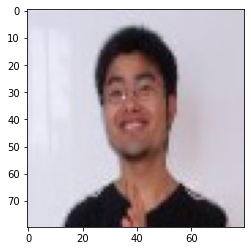

In [64]:
print(img_all[1000].shape)
print(type(label[1000]))
print(label[1000])
plt.imshow(img_all[1000])

In [48]:
def buffer(io):
    return io

img_all_arrs = np.array(list(map(buffer, img_all)))

(2023, 80, 80, 3)
(80, 80, 3)
human


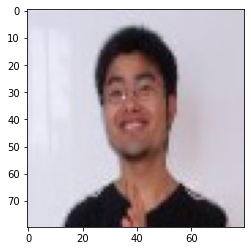

In [59]:
print(img_all_arrs.shape)
print(img_all_arrs[1000].shape)
print(label[1000])
plt.imshow(img_all_arrs[1000])

In [73]:
data = dict()

data['description'] = 'There are 20 classes and 2023 images of size 80x80x3'
data['data'] = img_all_arrs
data['target'] = label
data['labels'] = set(label)

In [77]:
#save the file in pickle